In [5]:
import nltk
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
sns.set_theme(style='whitegrid')
from collections import Counter
from nltk.corpus import stopwords

from matplotlib import pyplot as plt

from scipy.stats import chi2_contingency

%config InlineBackend.figure_format='retina'

In [6]:
df = pl.read_csv("claims.csv")
pl.Config.set_tbl_rows(-1)
pl.Config.set_fmt_str_lengths(1000)

# df = df.with_columns(Claim = pl.col("Claim").str.to_lowercase())

df.head()

Detail level,Claim,Soft/hard,Color,Annotator
str,str,str,str,str
"""High""","""Excited to apply for position""","""Soft""","""Orange""","""aksv"""
"""High""","""Studying Data Science at the IT University""","""Hard""","""Green""","""aksv"""
"""High""","""Eager to apply analytical and technical skills""","""Soft""","""Orange""","""aksv"""
"""High""","""1.5 years as student data analyst in the medical industry""","""Hard""","""Green""","""aksv"""
"""High""","""Strong skills in Python""","""Hard""","""Green""","""aksv"""


In [7]:
color_detail_level = (df.group_by("Color", "Detail level")
                      .agg(pl.len())
                      .sort("Color", "Detail level"))
color_detail_level

Color,Detail level,len
str,str,u32
"""Green""","""High""",54
"""Green""","""Low""",14
"""Green""","""Medium""",22
"""Green""","""None""",1
"""Orange""","""High""",36
"""Orange""","""Low""",60
"""Orange""","""Medium""",48
"""Orange""","""None""",39
"""Red""","""High""",2


# Distribution of claim color per detail level

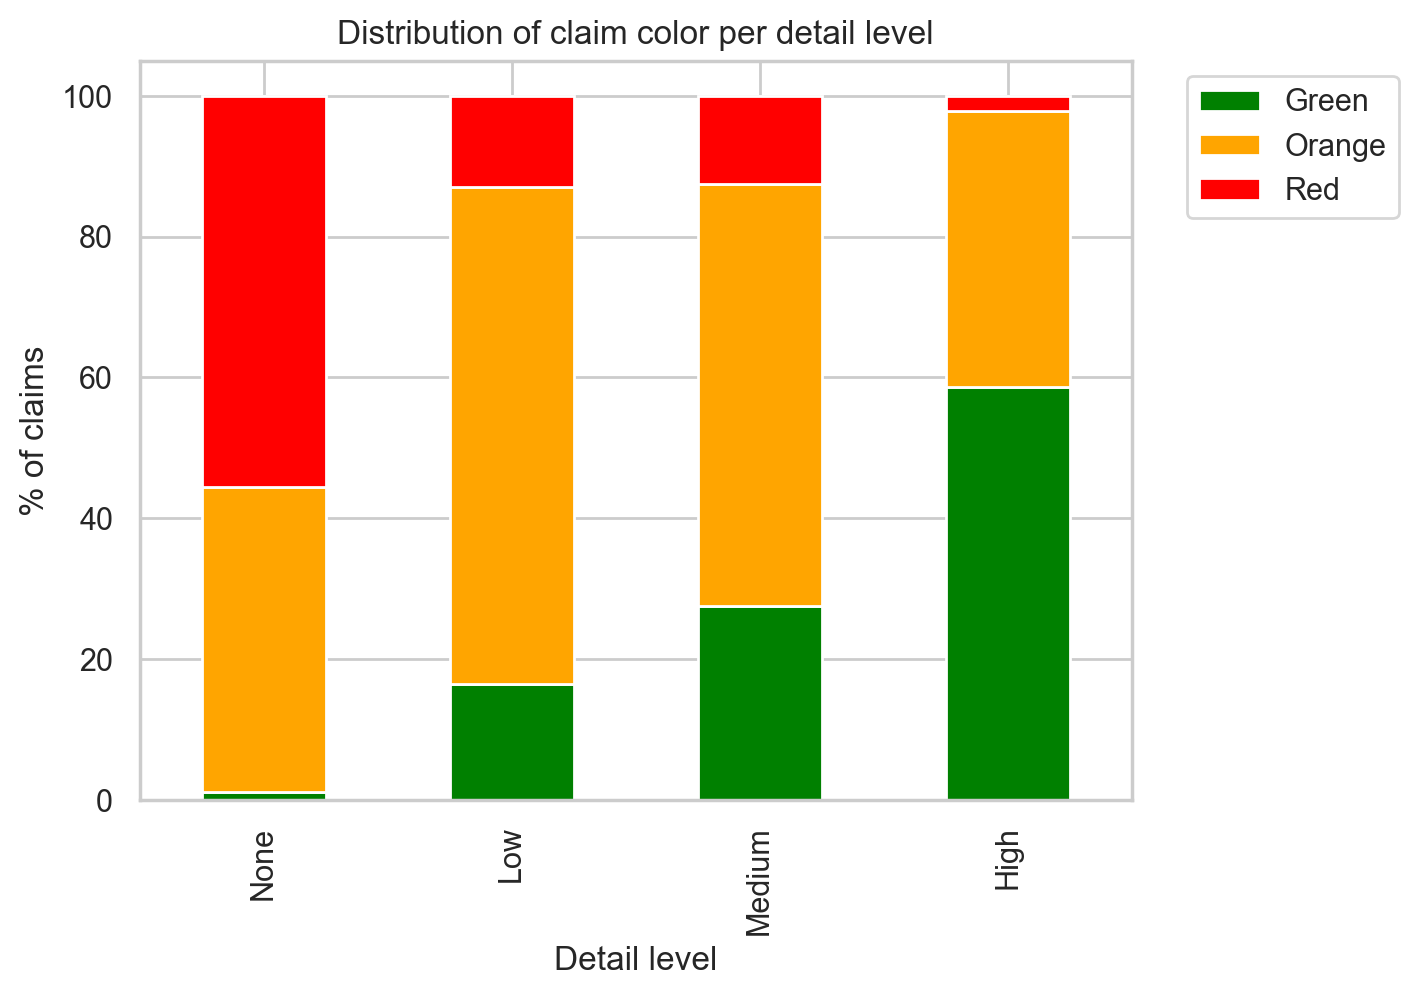

In [8]:
pandas_df = color_detail_level.to_pandas()
pivot_df = pandas_df.pivot(index='Detail level',
                    columns='Color',
                    values='len')

pivot_df = pivot_df.loc[["None", "Low", "Medium", "High"]]
palette = {x:x.lower() for x in color_detail_level["Color"]}

pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df_percentage.plot.bar(stacked=True,
                  grid=True,
                  color=palette
                  )

plt.legend(bbox_to_anchor=(1.04, 1), 
           loc='upper left')


plt.ylabel("% of claims")
plt.title("Distribution of claim color per detail level")

plt.show()

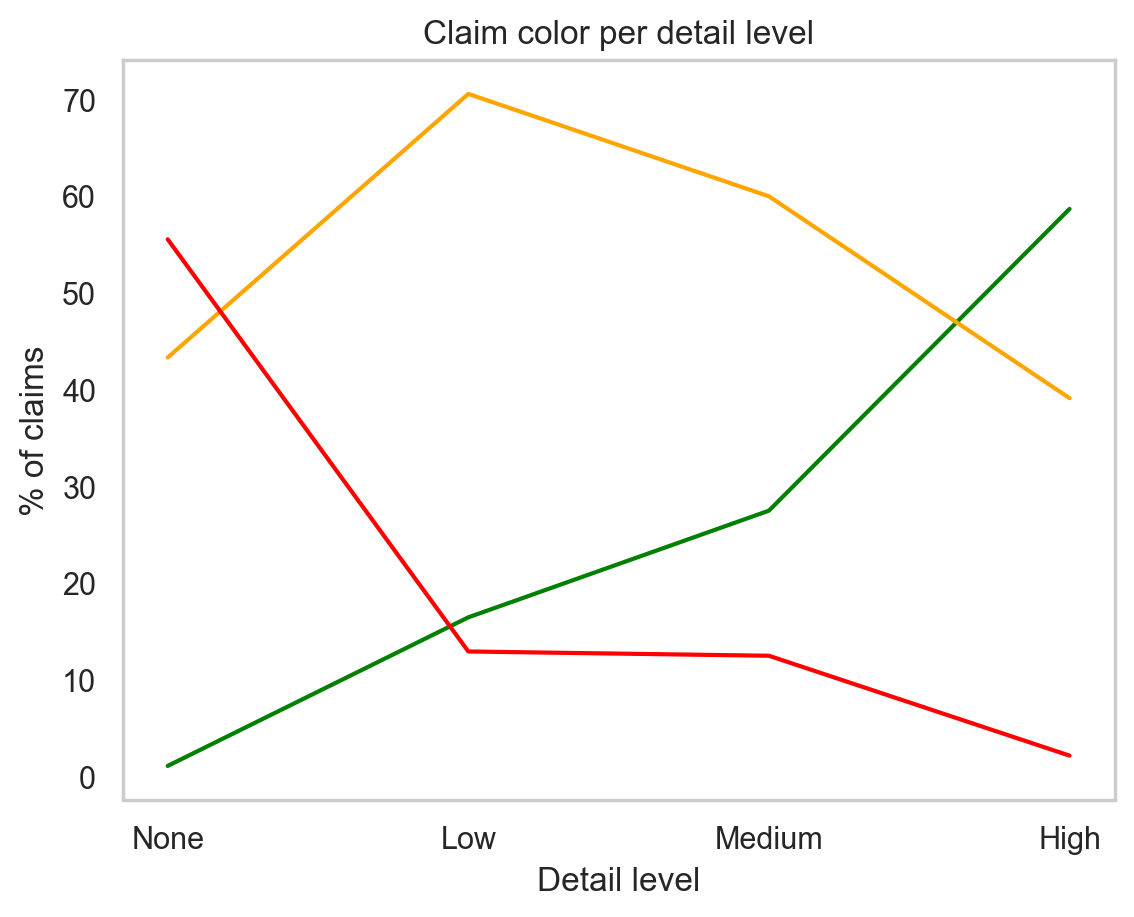

In [9]:
pivot_df_percentage.plot.line(
    color=palette
)

plt.legend('',frameon=False)
plt.ylabel("% of claims")
plt.title("Claim color per detail level")
plt.grid()
plt.show()

### Most common claims for each color

In [10]:
(df
 .group_by("Color", "Claim")
 .agg(pl.len())
 .sort("Color", "len" , descending=True)
 .filter(pl.col("len") >= 3))

Color,Claim,len
str,str,u32
"""Red""","""Experience with Power BI""",8
"""Red""","""Experience with SQL""",5
"""Red""","""Experience with Python""",5
"""Red""","""Strong skills in Python""",3
"""Red""","""Strong skills in SQL""",3
"""Red""","""Experience with data visualization""",3
"""Orange""","""Excited to apply for position""",11
"""Orange""","""Welcome opportunity to discuss how my skills align with the role""",10
"""Orange""","""Look forward to hearing from you""",6


In [14]:
(df
 .group_by("Color", "Detail level", "Claim")
 .agg(pl.len())
 .sort("Color","Detail level", "len","Claim" , descending=True))
!

## Chi-squared

Detail level,None,Low,Medium,High
Color,,,,
Green,1,14,22,54
Orange,39,60,48,36
Red,50,11,10,2


In [41]:
# values of the 2 x 4 contingency table
observed = np.transpose(pivot_df)

chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-squared statistic: {chi2:.2f}")
print(f"p-value: {p:.3g}")


Chi-squared statistic: 144.40
p-value: 1.18e-28
